### Thanh Nguyen-Duong
#### 4/30/2020
#### DSC 550 Week 11 & 12 (Part 1, 2 and 3)

#### Case Study Part 1 - Graph Analysis

____________________________

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Import necessary libraries

import pandas as pd
import yellowbrick
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#### Step 1: Load Data into a dataframe

In [44]:
data = pd.read_csv("epldata_final.csv")


#### Step 2:  check the dimension of the dataframe

In [45]:
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (461, 17)


#### Step 3:  Taking a look at the data head

In [46]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


#### Step 4:  what type of variables are in the table 

In [47]:
print("Describe Data \n", data.describe())

print("Summarized Data\n", data.describe(include=['O']))

Describe Data 
               age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  460.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993478     0.034707    3.206074   10.334056   
std     53.113811    0.957689     0.183236    1.279795    5.726475   
min      0.000000    1.000000     0.0

#### Step 5: Plot histograms for Age, Position, Market value and Page Views variables

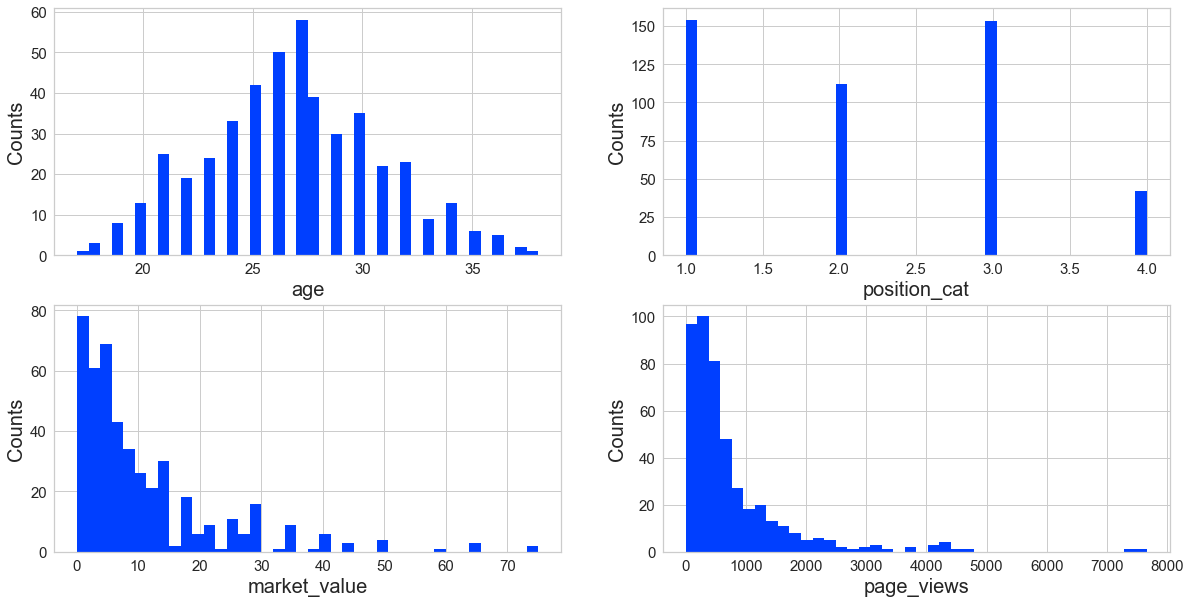

In [48]:
# setup figure sizes
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# Specify the features of interest
num_features = ['age', 'position_cat', 'market_value', 'page_views']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

#### Step 6: Barcharts of Position Categories, Region, New Foreign, and New Signing variables

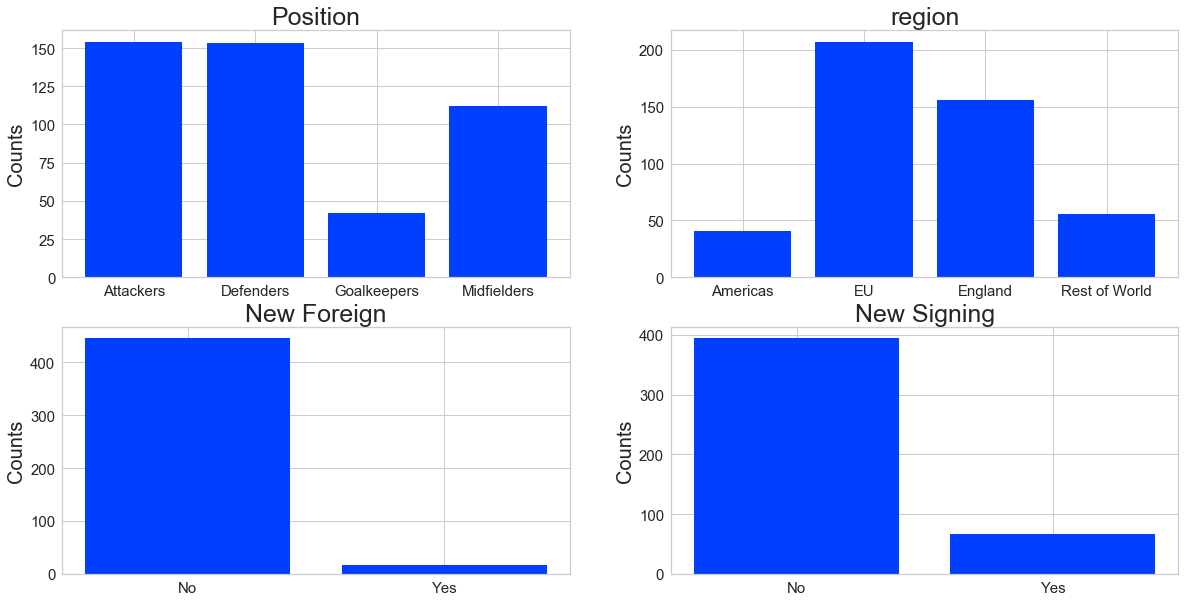

In [49]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visualizer
X_Position = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}}).groupby('position_cat').size().reset_index(name='Counts')['position_cat']
Y_Position = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}}).groupby('position_cat').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Position, Y_Position)
axes[0, 0].set_title('Position', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_Region = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}}).groupby('region').size().reset_index(name='Counts')['region']
Y_Region = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}}).groupby('region').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Region, Y_Region)
axes[0, 1].set_title('region', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_new_foreign = data.replace({'new_foreign':{0: 'No', 1: 'Yes'}}).groupby('new_foreign').size().reset_index(name='Counts')['new_foreign']
Y_new_foreign = data.replace({'new_foreign':{0: 'No', 1: 'Yes'}}).groupby('new_foreign').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_new_foreign, Y_new_foreign)
axes[1, 0].set_title('New Foreign', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visualizer
X_new_signing = data.replace({'new_signing':{0: 'No', 1: 'Yes'}}).groupby('new_signing').size().reset_index(name='Counts')['new_signing']
Y_new_signing = data.replace({'new_signing':{0: 'No', 1: 'Yes'}}).groupby('new_signing').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_new_signing, Y_new_signing)
axes[1, 1].set_title('New Signing', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

#### Step 7: Pearson Correlation Ranking

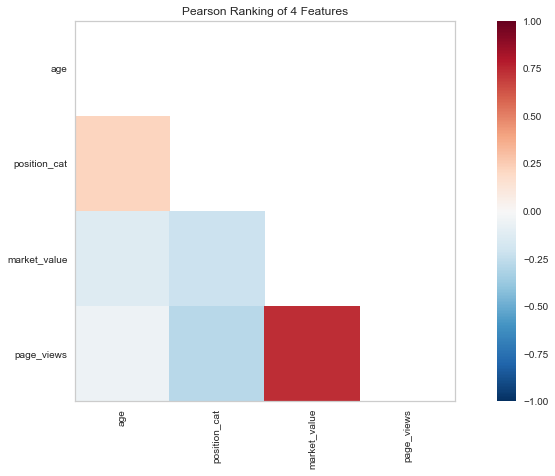

In [50]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D
# extract the numpy arrays from the data frame
X = data[num_features].values
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()

#### Step 8: Compare variables New Signing vs. Not a New Signing

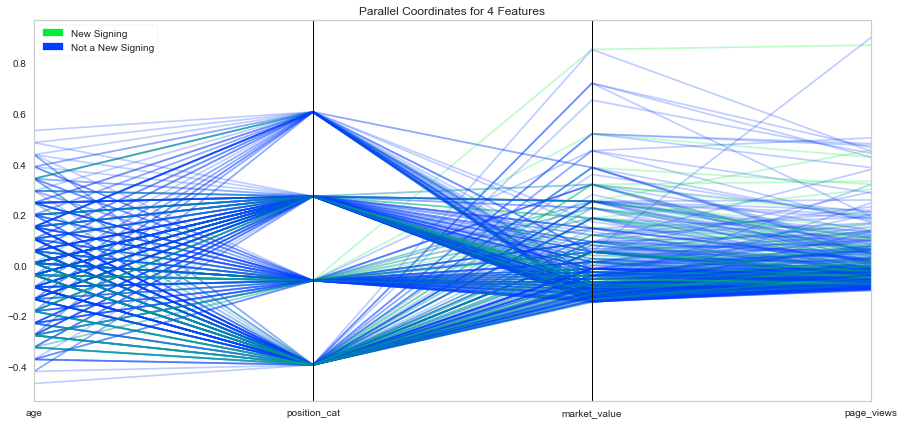

In [51]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50
# setup the color for yellowbrick visualizer
set_palette('sns_bright')
# Specify the features of interest and the classes of the target
classes = ['Not a New Signing', 'New Signing']
num_features = ['age', 'position_cat', 'market_value', 'page_views']
# copy data to a new dataframe
data_norm = data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))
# Extract the numpy arrays from the data frame
X = data_norm[num_features].as_matrix()
y = data.new_signing.as_matrix()
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data
plt.show()

#### Step 9: Stacked bar charts to compare New Signing vs. Not New Signing

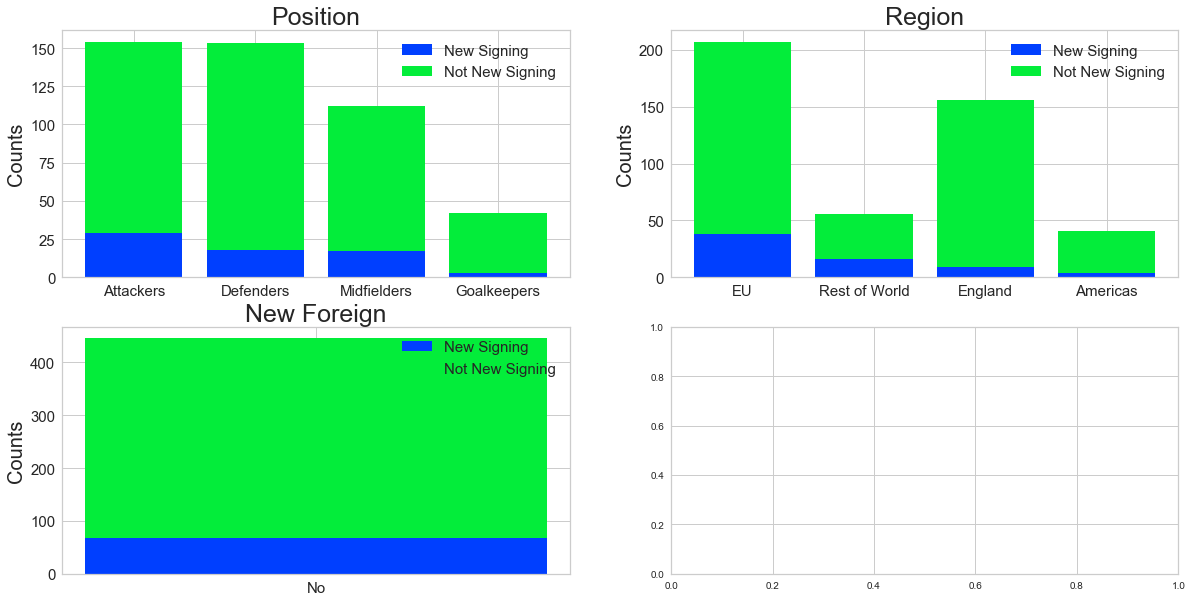

In [52]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visualizer
Position_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})[data['new_signing']==1]['position_cat'].value_counts()
Position_not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})[data['new_signing']==0]['position_cat'].value_counts()
Position_not_new_signing = Position_not_new_signing.reindex(index = Position_new_signing.index)
# make the bar plot
p1 = axes[0, 0].bar(Position_new_signing.index, Position_new_signing.values)
p2 = axes[0, 0].bar(Position_not_new_signing.index, Position_not_new_signing.values, bottom=Position_new_signing.values)
axes[0, 0].set_title('Position', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('New Signing', 'Not New Signing'), fontsize = 15)


# make the data read to feed into the visualizer
region_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})[data['new_signing']==1]['region'].value_counts()
region_not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})[data['new_signing']==0]['region'].value_counts()
region_not_new_signing = region_not_new_signing.reindex(index = region_new_signing.index)

# make the bar plot
p3 = axes[0, 1].bar(region_new_signing.index, region_new_signing.values)
p4 = axes[0, 1].bar(region_not_new_signing.index, region_not_new_signing.values, bottom=region_new_signing.values)
axes[0, 1].set_title('Region', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('New Signing', 'Not New Signing'), fontsize = 15)

# make the data read to feed into the visualizer
new_foreign_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'new_foreign': {0: 'No', 1: 'Yes'}})[data['new_signing']==1]['new_foreign'].value_counts()
new_foreign__not_new_signing = data.replace({'new_signing': {1: 'New Signing', 0: 'Not New Signing'}}).replace({'new_foreign': {0: 'No', 1: 'Yes'}})[data['new_signing']==0]['new_foreign'].value_counts()
new_foreign__not_new_signing = new_foreign__not_new_signing.reindex(index = new_foreign_new_signing.index)
# make the bar plot
p5 = axes[1, 0].bar(new_foreign_new_signing.index, new_foreign_new_signing.values)
p6 = axes[1, 0].bar(new_foreign__not_new_signing.index, new_foreign__not_new_signing.values, bottom=new_foreign_new_signing.values)
axes[1, 0].set_title('New Foreign', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('New Signing', 'Not New Signing'), fontsize = 15)

plt.show()

### Case Study Part 2 - Dimensionality and Feature Reduction


#### Step 10 - fill in missing values and eliminate features

In [53]:
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['age'])

# check the result
print(data['age'].describe())

# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['page_views'])

# check the result
print(data['page_views'].describe())

# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)


count    461.000000
mean      26.804772
std        3.961892
min       17.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       38.000000
Name: age, dtype: float64
count     461.000000
mean      763.776573
std       931.805757
min         3.000000
25%       220.000000
50%       460.000000
75%       896.000000
max      7664.000000
Name: page_views, dtype: float64


#### Step 11 - Check the Data

In [54]:
print(data.describe())

              age  position_cat  market_value   page_views   fpl_value  \
count  461.000000    461.000000    461.000000   461.000000  461.000000   
mean    26.804772      2.180043     11.012039   763.776573    5.447939   
std      3.961892      1.000061     12.257403   931.805757    1.346695   
min     17.000000      1.000000      0.050000     3.000000    4.000000   
25%     24.000000      1.000000      3.000000   220.000000    4.500000   
50%     27.000000      2.000000      7.000000   460.000000    5.000000   
75%     30.000000      3.000000     15.000000   896.000000    5.500000   
max     38.000000      4.000000     75.000000  7664.000000   12.500000   

       fpl_points      region  new_foreign     age_cat     club_id  \
count  461.000000  460.000000   461.000000  461.000000  461.000000   
mean    57.314534    1.993478     0.034707    3.206074   10.334056   
std     53.113811    0.957689     0.183236    1.279795    5.726475   
min      0.000000    1.000000     0.000000    1.00000

#### Step 12 - adjust skewed data (fare)

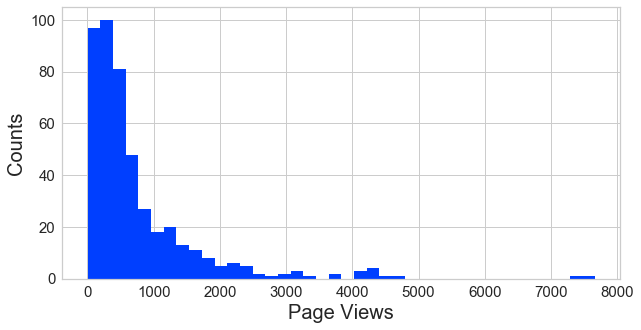

In [55]:
# check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['page_views'], bins=40)
plt.xlabel('Page Views', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

#### Step 13 - convert categorical data to numbers

In [56]:
# get the categorical data
cat_features = ['position_cat', 'age', "market_value", 'page_views', 'fpl_value', 'fpl_points', 'region', 'new_foreign', 'new_signing']
data_cat = data[cat_features]
data_cat = data_cat.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})
data_cat_2 = data_cat.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat_2)
# check the data
# print(data_cat_dummies.head(8))
print(data_cat_dummies[:8])

   age  market_value  page_views  fpl_value  fpl_points  new_foreign  \
0   28          65.0        4329       12.0         264            0   
1   28          50.0        4395        9.5         167            0   
2   35           7.0        1529        5.5         134            0   
3   28          20.0        2393        7.5         122            0   
4   31          22.0         912        6.0         121            0   
5   22          30.0        1675        6.0         119            0   
6   30          22.0        2230        8.5         116            0   
7   31          13.0         555        5.5         115            0   

   new_signing  position_cat_Attackers  position_cat_Defenders  \
0            0                       1                       0   
1            0                       1                       0   
2            0                       0                       0   
3            0                       1                       0   
4            0       

In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
#print(target[:8])
features = data_cat_dummies[['age', 'page_views', 'fpl_value', 'fpl_points', 'new_foreign', 'new_signing', 'position_cat_Attackers', 
            'position_cat_Defenders', 'position_cat_Goalkeepers', 'position_cat_Midfielders', 'region_Americas', 
            'region_EU', 'region_England', 'region_Rest of World']].values
print ('Features (First 5):')
print(features[:5])
target = data_cat_dummies[['market_value']].values
print('Target (First 5):')
print(target[:5])

Features (First 5):
[[2.800e+01 4.329e+03 1.200e+01 2.640e+02 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [2.800e+01 4.395e+03 9.500e+00 1.670e+02 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [3.500e+01 1.529e+03 5.500e+00 1.340e+02 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]
 [2.800e+01 2.393e+03 7.500e+00 1.220e+02 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00]
 [3.100e+01 9.120e+02 6.000e+00 1.210e+02 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00]]
Target (First 5):
[[65.]
 [50.]
 [ 7.]
 [20.]
 [22.]]


In [59]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=0)


In [60]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std = sc.fit_transform(features_train)

# Apply the scaler to the test data
features_test_std = sc.transform(features_test)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded = lab_enc.fit_transform(target_train)
target_test_encoded = lab_enc.fit_transform(target_test)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(features_train, target_train_encoded)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train, target_train_encoded))
    print('Test accuracy:', clf.score(features_test, target_test_encoded))
    print('')


C: 10
Coefficient of each feature: [[ 0.00000000e+00  3.03530413e-03 -1.52280441e+00 -1.24587907e+00
   0.00000000e+00  8.21512547e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.22287408e-01  1.35091955e-03  0.00000000e+00 -1.15262824e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   6.90375325e+00  0.00000000e+00  0.00000000e+00  4.85325272e+00
   0.00000000e+00  0.00000000e+00]
 [-4.36439149e-03 -1.29917654e-02 -1.03766220e+00 -1.21700029e-01
  -3.88385186e-01  0.00000000e+00  1.43898609e+00 -9.94912499e-01
   0.00000000e+00  1.28263044e+00  0.00000000e+00  7.96573516e-01
   3.22142283e+00  0.00000000e+00]
 [ 4.42140094e-02 -8.35890718e-03 -2.55972412e+00 -4.15630426e-02
   2.22323155e+00 -1.70293786e+00  1.33483021e+00  1.89605013e-02
  -6.55407129e-01  0.00000000e+00  1.05204665e+00  0.00000000e+00
   8.19866129e-01 -2.95009970e+00]
 [ 2.73446695e-01 -1.07285963e+00

In [61]:
# L1
# C: 10
# Training accuracy: 0.34782608695652173
# Test accuracy: 0.04316546762589928

# C: 1
# Training accuracy: 0.2453416149068323
# Test accuracy: 0.02877697841726619

#C: 0.1
# Training accuracy: 0.13354037267080746
# Test accuracy: 0.04316546762589928

# C: 0.001
# Training accuracy: 0.09316770186335403
# Test accuracy: 0.02158273381294964

In [62]:
for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(features_train, target_train_encoded)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train, target_train_encoded))
    print('Test accuracy:', clf.score(features_test, target_test_encoded))
    print('')




C: 10
Coefficient of each feature: [[ 9.89003563e-02  2.83725357e-03 -1.74345540e+00 -7.79038070e-01
  -1.90534701e-01  3.58585110e+00  1.02792485e+00 -8.46183573e-01
  -4.16914369e-01 -4.28635895e-01 -3.76206127e-01  5.81132035e-01
  -5.66865962e-01 -2.94689151e-01]
 [-3.41949834e-01  8.01497951e-04  6.01338256e-02 -6.58997340e-02
  -5.95295841e-01 -1.75934034e-01 -8.77210399e-01 -6.83548624e-01
   3.16847509e+00 -5.87753181e-01 -2.98576586e-01  2.22882899e+00
  -6.79072527e-01 -2.21091004e-01]
 [ 5.22851808e-03 -1.28046356e-02 -8.15423630e-01 -1.13576905e-01
  -7.53717238e-01 -3.45630274e-01  1.22376020e+00 -1.05424194e+00
  -2.13854823e-02  1.15875947e+00 -4.73344969e-01  3.02255645e-01
   2.57381263e+00 -4.97652749e-01]
 [ 7.62702269e-02 -8.43426372e-03 -1.48391850e+00 -4.32161309e-02
   1.74157480e+00 -1.20407021e+00  1.49774032e+00  5.93316080e-01
  -9.89322671e-02  2.46349526e-01  1.47201337e+00  8.39623363e-01
   1.71756524e+00 -1.54222529e+00]
 [ 2.84242917e-01 -1.07217058e+00

In [63]:
# L2
# C: 10
# Training accuracy: 0.3198757763975155
# Test accuracy: 0.04316546762589928

# C: 1
# Training accuracy: 0.2546583850931677
# Test accuracy: 0.050359712230215826

# C: 0.1
# Training accuracy: 0.18944099378881987
# Test accuracy: 0.04316546762589928

# C: 0.001
# Training accuracy: 0.11801242236024845
# Test accuracy: 0.04316546762589928

In [64]:
# Based on previous results, removing the Fantasy features and increasing the Training set to 85% to see if this improves results

features_2 = data_cat_dummies[['age', 'page_views', 'new_foreign', 'new_signing', 'position_cat_Attackers', 
            'position_cat_Defenders', 'position_cat_Goalkeepers', 'position_cat_Midfielders', 'region_Americas', 
            'region_EU', 'region_England', 'region_Rest of World']].values
print ('Features (First 5):')
print(features_2[:5])
target_2 = data_cat_dummies[['market_value']].values
print('Target (First 5):')
print(target_2[:5])

Features (First 5):
[[  28 4329    0    0    1    0    0    0    1    0    0    0]
 [  28 4395    0    0    1    0    0    0    0    1    0    0]
 [  35 1529    0    0    0    0    1    0    0    1    0    0]
 [  28 2393    0    0    1    0    0    0    0    0    1    0]
 [  31  912    0    0    0    1    0    0    0    1    0    0]]
Target (First 5):
[[65.]
 [50.]
 [ 7.]
 [20.]
 [22.]]


In [65]:
features_train_2, features_test_2, target_train_2, target_test_2 = train_test_split(features_2, target_2, test_size=0.15, random_state=0)


In [66]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std_2 = sc.fit_transform(features_train_2)

# Apply the scaler to the test data
features_test_std_2 = sc.transform(features_test_2)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded_2 = lab_enc.fit_transform(target_train_2)
target_test_encoded_2 = lab_enc.fit_transform(target_test_2)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c)
    clf.fit(features_train_2, target_train_encoded_2)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train_2, target_train_encoded_2))
    print('Test accuracy:', clf.score(features_test_2, target_test_encoded_2))
    print('')


C: 10
Coefficient of each feature: [[ 3.30547671e-01 -3.22732063e-03  0.00000000e+00  3.88172088e+00
   3.19077581e+00 -3.53942580e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  8.69108469e-01  0.00000000e+00  0.00000000e+00]
 [-5.80233223e-01 -1.82422432e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.75538651e+00  0.00000000e+00
   0.00000000e+00  5.53978278e+00  0.00000000e+00  0.00000000e+00]
 [-1.76917671e-02 -2.12558323e-02 -2.91935036e-01  0.00000000e+00
   0.00000000e+00 -1.85725591e+00  5.04412262e-01  0.00000000e+00
   0.00000000e+00  4.67407370e-01  2.59293706e+00  0.00000000e+00]
 [-2.45875543e-02 -1.28652061e-02  1.11468527e+00 -1.64752257e+00
   4.27122045e-01 -9.79420587e-02 -1.68905413e-01  0.00000000e+00
   3.25768883e-01  2.29709044e-01  3.82166368e-01 -2.35660319e+00]
 [ 2.76767047e-01 -1.09279565e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.

In [67]:
# L1
# C: 10
# Training accuracy: 0.23529411764705882
# Test accuracy: 0.05714285714285714

# C: 1
# Training accuracy: 0.17902813299232737
# Test accuracy: 0.05714285714285714

#C: 0.1
# Training accuracy: 0.11508951406649616
# Test accuracy: 0.07142857142857142

# C: 0.001
# Training accuracy: 0.10741687979539642
# Test accuracy: 0.014285714285714285

In [68]:
#standardize features
# Create a scaler object
sc = StandardScaler()
# Fit the scaler to the training data and transform
features_train_std_2 = sc.fit_transform(features_train_2)

# Apply the scaler to the test data
features_test_std_2 = sc.transform(features_test_2)

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
target_train_encoded_2 = lab_enc.fit_transform(target_train_2)
target_test_encoded_2 = lab_enc.fit_transform(target_test_2)

#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l2', C=c)
    clf.fit(features_train_2, target_train_encoded_2)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(features_train_2, target_train_encoded_2))
    print('Test accuracy:', clf.score(features_test_2, target_test_encoded_2))
    print('')

C: 10
Coefficient of each feature: [[-4.57380370e-02 -3.00936911e-03 -2.58115078e-01  2.50694703e+00
   7.24869636e-01 -1.67474111e+00 -6.65155880e-01 -1.60615182e+00
  -5.00485109e-01  1.90575518e-01 -1.37105975e+00 -1.29592985e+00]
 [-3.63561040e-01 -9.77411017e-04 -2.89173846e-01 -3.05969708e-01
  -6.22745550e-01 -8.01672020e-01  3.37383021e+00 -6.33218447e-01
  -2.30897459e-01  2.27985483e+00 -5.97400823e-01 -1.28720374e-01]
 [-9.52222436e-03 -2.06002200e-02 -6.49641837e-01 -4.63383838e-01
   1.45368575e-01 -1.56025248e+00  7.52234945e-01  1.97278573e-01
  -7.20933853e-01  1.45136254e-01  2.15826914e+00 -6.85867861e-01]
 [-1.88155388e-02 -1.31256909e-02  1.06493599e+00 -1.33460689e+00
   3.30153745e-01 -3.08298312e-01 -4.18935912e-01 -1.64403517e-01
   8.73655745e-01  7.73240336e-01  9.30619490e-01 -1.46523565e+00]
 [ 2.76276776e-01 -1.05451522e+00 -1.25802986e-01 -9.14661598e-06
  -1.28059787e-04 -4.28263905e-03 -3.70483189e-04 -1.08131045e-02
   1.24027623e-01 -1.30447013e-01 -9.

In [69]:
# L2
# C: 10
# Training accuracy: 0.22250639386189258
# Test accuracy: 0.04285714285714286

# C: 1
# Training accuracy: 0.18925831202046037
# Test accuracy: 0.02857142857142857

# C: 0.1
# Training accuracy: 0.16624040920716113
# Test accuracy: 0.04285714285714286

# C: 0.001
# Training accuracy: 0.11764705882352941
# Test accuracy: 0.05714285714285714

#### Step 14 - create a whole features dataset that can be used for train and validation data splitting


In [92]:
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
# REMOVED 'position', 'region'
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
# data_model_y = data.replace({'new_foreign': {1: 'New Foreign', 0: 'Not New Foreign'}})['new_foreign']
# data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']
data_model_y = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})['region']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of each region in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each region in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  322
No. of samples in validation set: 139


No. of each region in the training set:
EU               141
England          109
Rest of World     41
Americas          31
Name: region, dtype: int64


No. of each region in the validation set:
EU               66
England          47
Rest of World    15
Americas         10
Name: region, dtype: int64


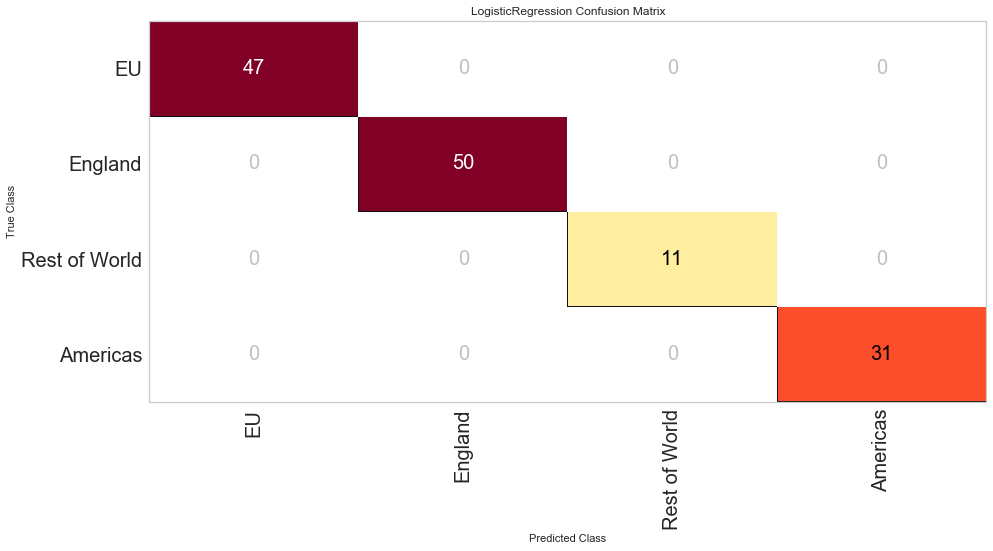

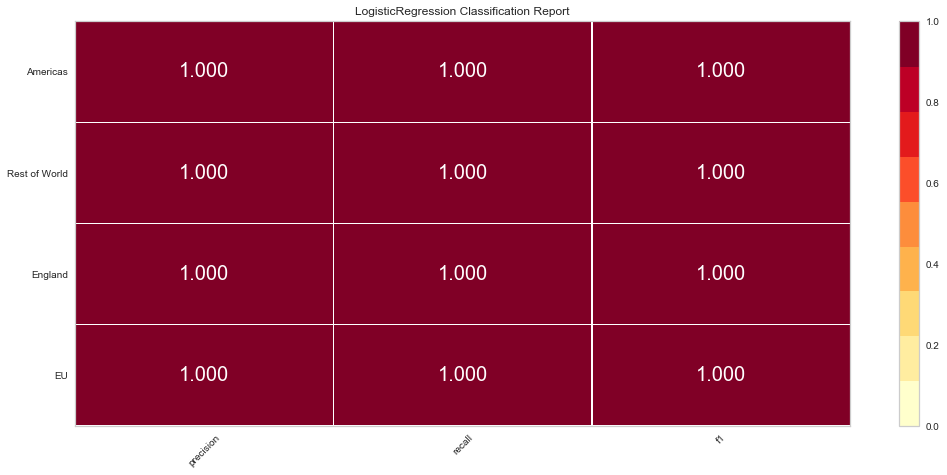

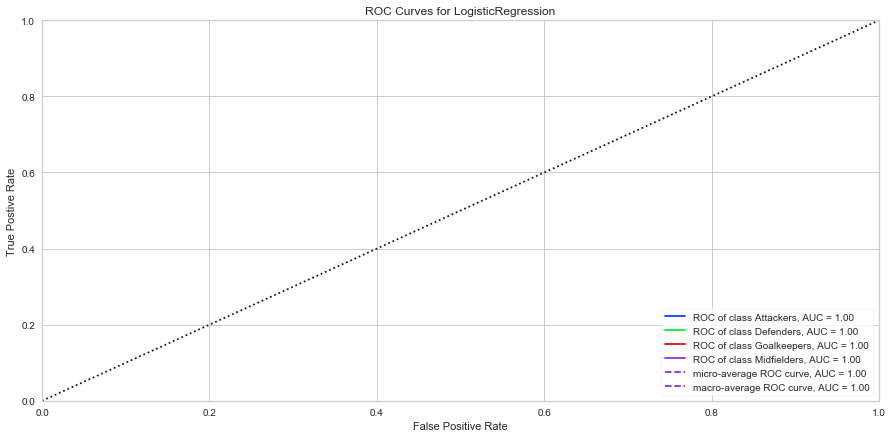

In [91]:

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['EU', 'England', 'Rest of World', 'Americas']
cm = ConfusionMatrix(model, classes=classes, percent= False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [84]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
# REMOVED 'position', 'region'
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
# data_model_y = data.replace({'new_foreign': {1: 'New Foreign', 0: 'Not New Foreign'}})['new_foreign']
# data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']
data_model_y = data.replace({'region': {1: 'England', 2: 'EU', 3: 'Americas', 4: 'Rest of World'}})['region']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.9, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of each region in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each region in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  46
No. of samples in validation set: 415


No. of each region in the training set:
EU               23
England          17
Americas          3
Rest of World     3
Name: region, dtype: int64


No. of each region in the validation set:
EU               184
England          139
Rest of World     53
Americas          38
Name: region, dtype: int64


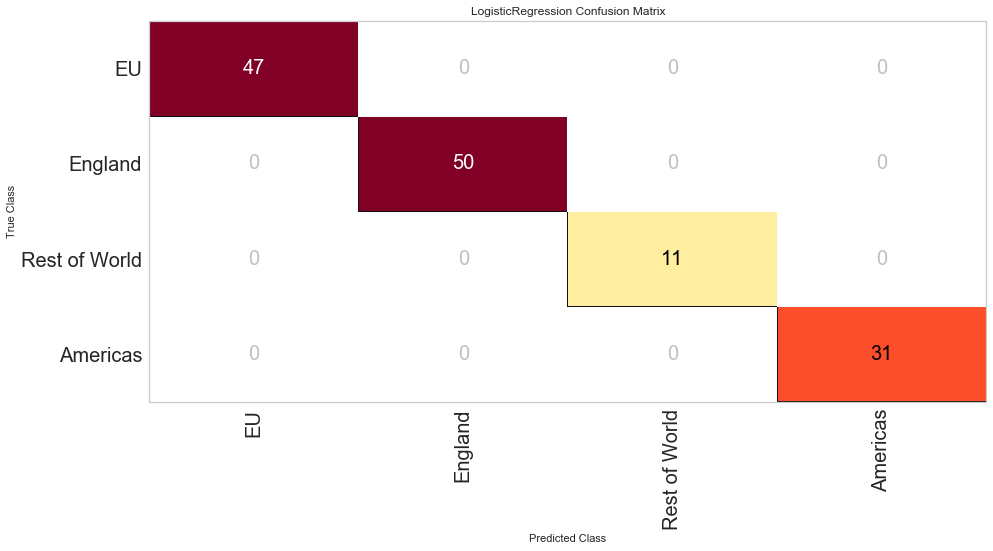

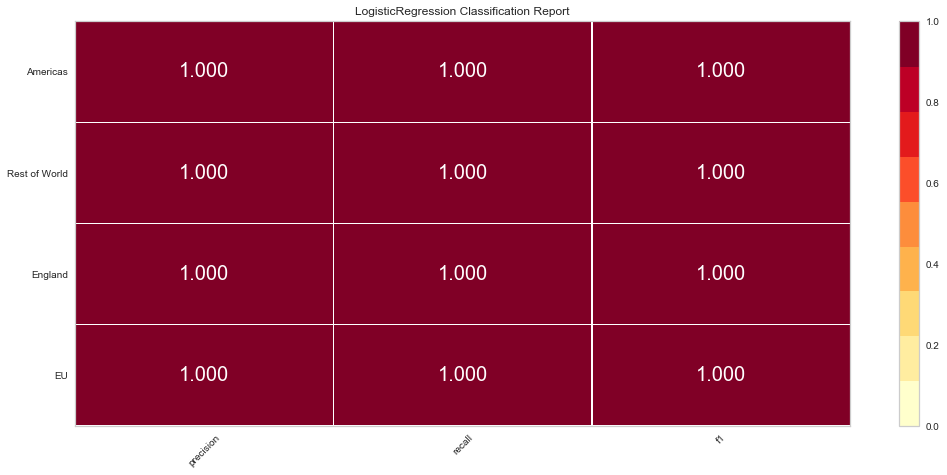

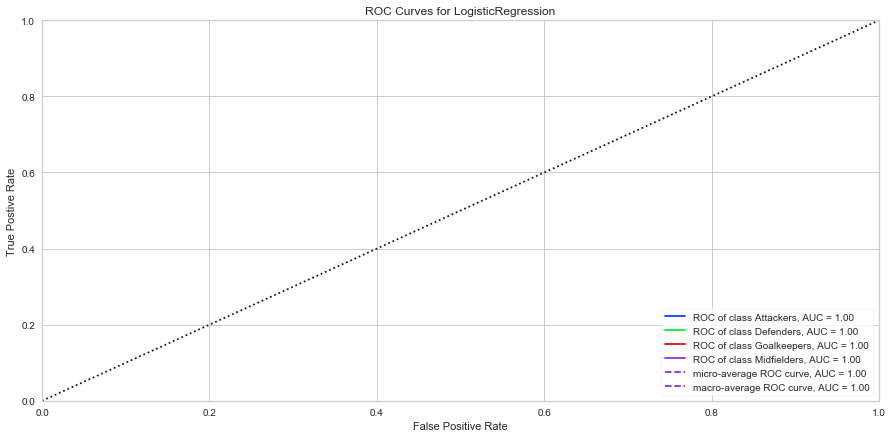

In [90]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['EU', 'England', 'Rest of World', 'Americas']
cm = ConfusionMatrix(model, classes=classes, percent= False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [86]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.9, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Position Breakdown in each set
print('\n')
print('No. of each position in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each position in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  46
No. of samples in validation set: 415


No. of each position in the training set:
Attackers      16
Defenders      16
Midfielders     7
Goalkeepers     7
Name: position_cat, dtype: int64


No. of each position in the validation set:
Attackers      138
Defenders      137
Midfielders    105
Goalkeepers     35
Name: position_cat, dtype: int64


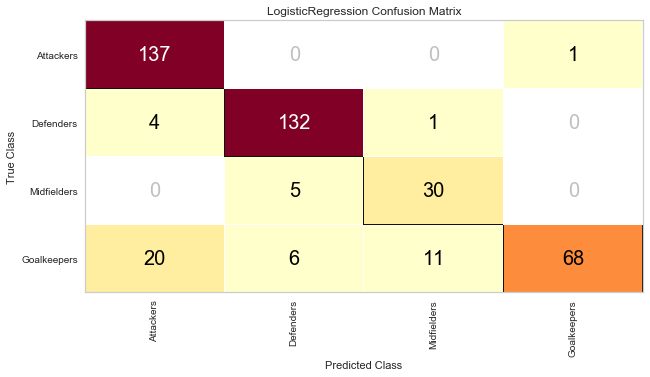

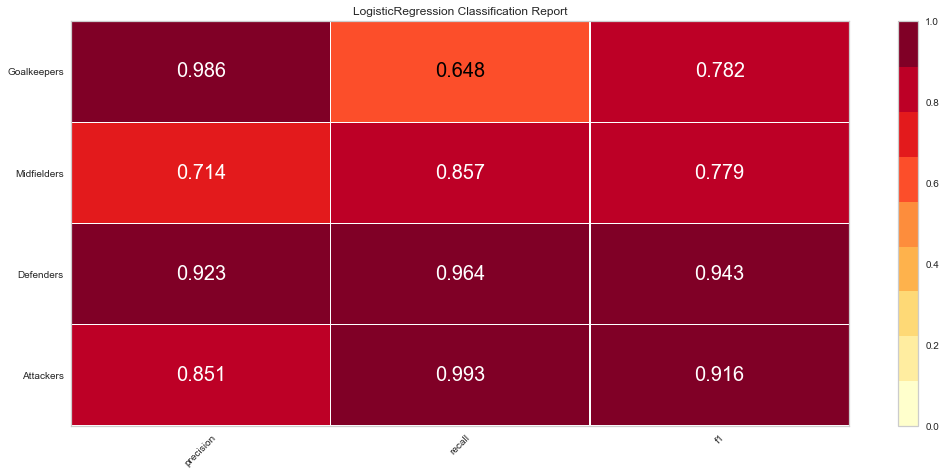

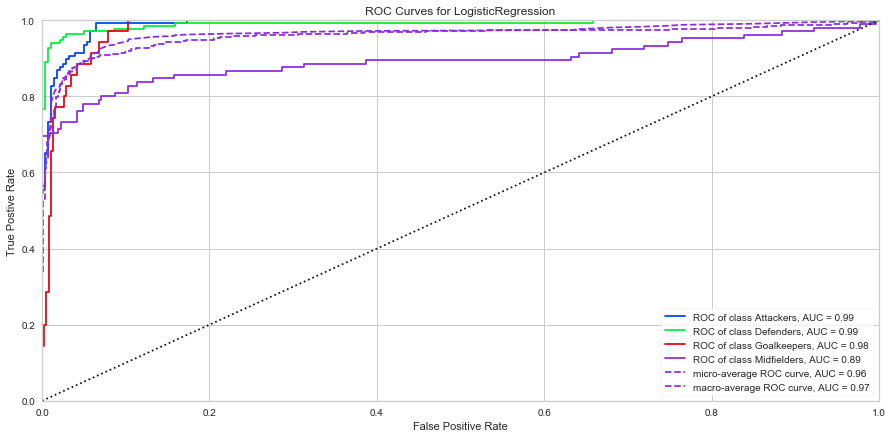

In [87]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Attackers', 'Defenders', 'Midfielders', 'Goalkeepers']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [88]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['age', 'page_views', 'new_signing', 'fpl_value', 'fpl_points', 'market_value']
data_model_X = pd.concat([data[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = data.replace({'position_cat': {1: 'Attackers', 2: 'Midfielders', 3: 'Defenders', 4: 'Goalkeepers'}})['position_cat']


# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Position Breakdown in each set
print('\n')
print('No. of each position in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of each position in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  322
No. of samples in validation set: 139


No. of each position in the training set:
Attackers      107
Defenders      103
Midfielders     81
Goalkeepers     31
Name: position_cat, dtype: int64


No. of each position in the validation set:
Defenders      50
Attackers      47
Midfielders    31
Goalkeepers    11
Name: position_cat, dtype: int64


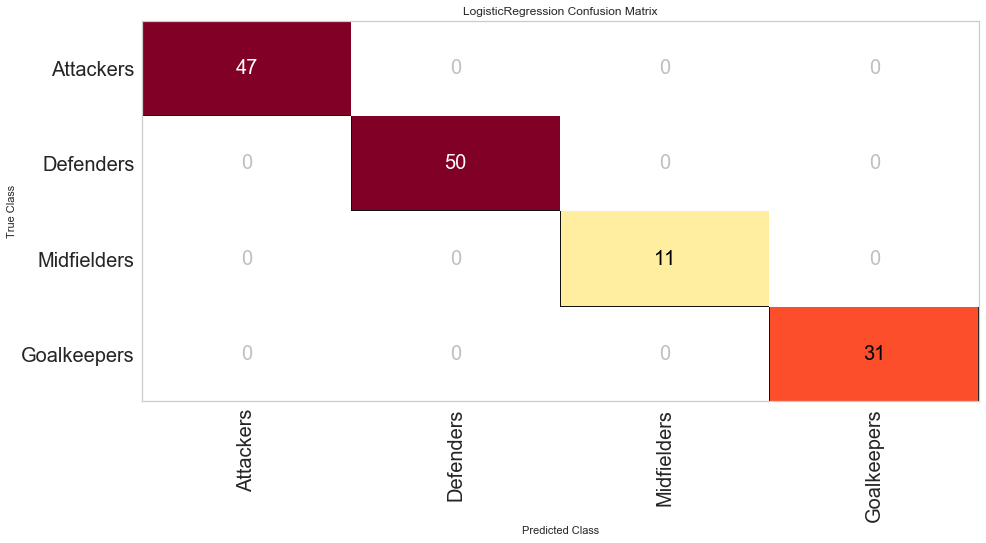

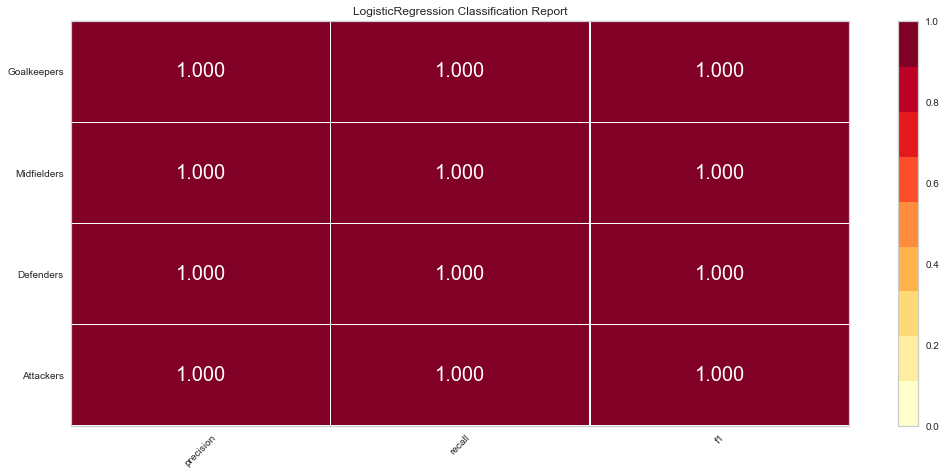

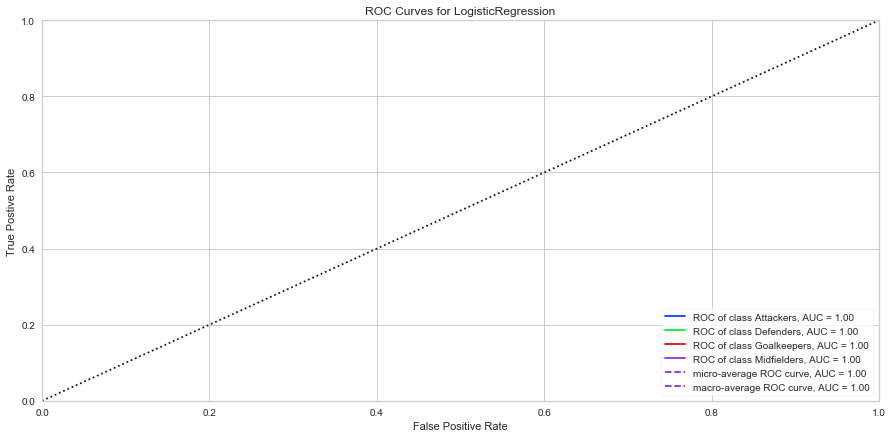

In [89]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Attackers', 'Defenders', 'Midfielders', 'Goalkeepers']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()